# Movie Recommendation System

### Objectives

1. Explore data collected
2. Make personalized movie recommendations based on selected movie 

### Project Objectives
This project is to build a **Machine Learning Model** to assist in making personalized movie recommendations based on a selected movie.


### Table of Content
[**1. Data importation**](#1.Data-Gathering-and-Cleaning)

[**2. Exploratory data analysis, data cleaning, and Feature engineering**](#2.Exploratory-data-analysis,data-cleaning,and-Feature-Engineering)

[**3. Data preprocessing for modeling**](#3.Data-Preprocessing-for-Modeling)


### Importing the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import ast
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## 1.Data-Gathering-and-Cleaning

### About the data

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')
print(f"The movies dataset has {movies.shape[0]} rows and {movies.shape[1]} columns")
print(f"The credits dataset has {credits.shape[0]} rows and {credits.shape[1]} columns")

The movies dataset has 4803 rows and 20 columns
The credits dataset has 4803 rows and 4 columns


## 2.Exploratory-data-analysis,data-cleaning,and-Feature-Engineering

### Inspecting the data

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Checking the data types of the different columns

In [5]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [6]:
credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [7]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Merging movies dataframe to credits

In [8]:
movies = movies.merge(credits,on='title')

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Checking for missing values

In [10]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

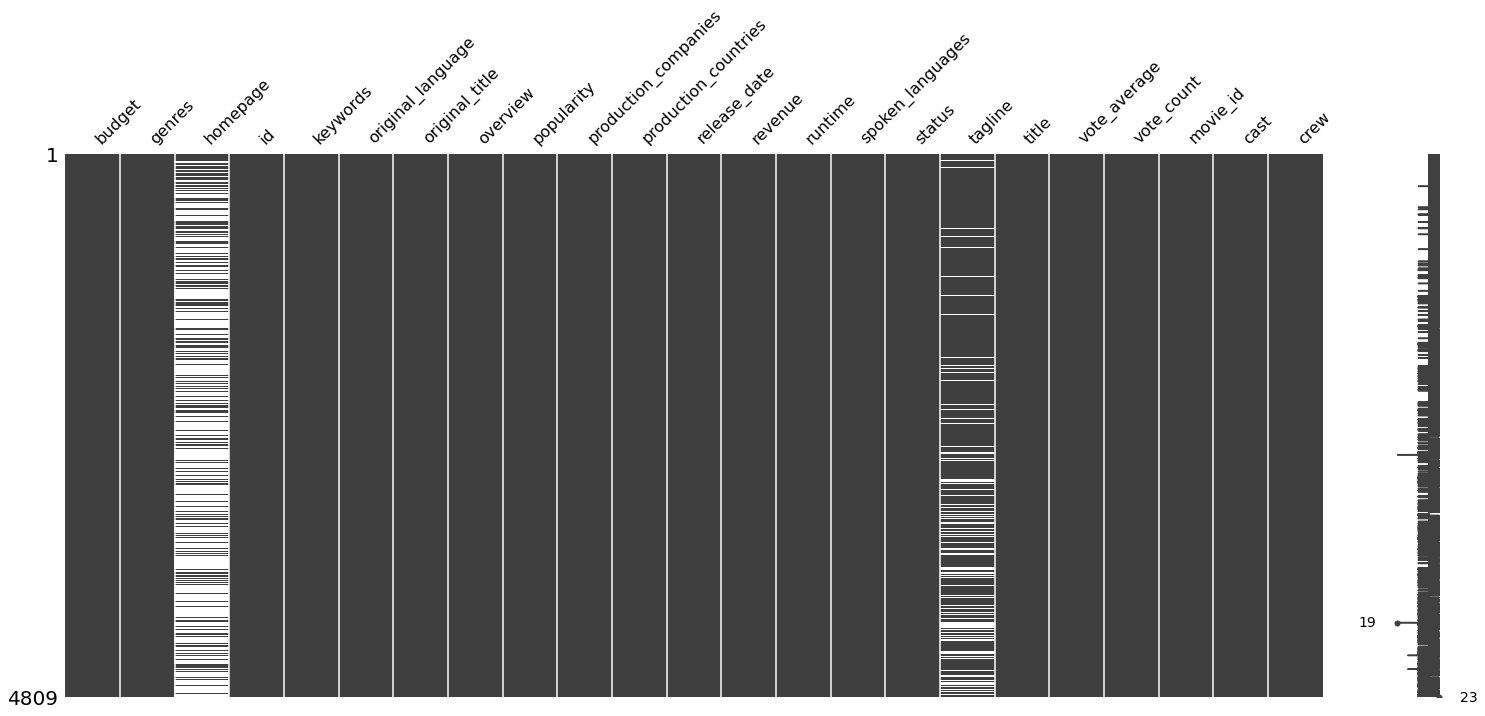

In [11]:
# visualizing missing values
msno.matrix(movies,color=(0.25, 0.25, 0.25))
plt.show()

+ A brief inspection of the data reveals that there were some missing values especially in the 'homepage' and 'tagline' columns as represented by the white areas

### Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.

In [12]:
# function to explore the categorical variables

def explore_cat(dataframe,column):
    '''
    This function returns a summary of a categorical variable
    '''
    unique_categories = dataframe[column].nunique()
    if unique_categories <= 5:
        print('Summary')
        print('====================================================')
        print(dataframe[column].describe(),'\n')
#         sns.countplot(dataframe[column], palette='hls')
#         plt.show()
        print('====================================================')
        print('Value counts \n')
        print(dataframe[column].value_counts(), '\n')
        print()
    else:
        print('Summary')
        print('====================================================')
        print(dataframe[column].describe(),'\n')
#         sns.countplot(y=dataframe[column], palette='hls')
#         plt.show()
        print('====================================================')
        print('Value counts \n')
        print(dataframe[column].value_counts(), '\n')
    

### Exploring Original Language 

In [13]:
explore_cat(movies,'original_language') 

Summary
count     4809
unique      37
top         en
freq      4510
Name: original_language, dtype: object 

Value counts 

en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      12
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
id       2
ro       2
cs       2
ta       2
ar       2
hu       1
sl       1
vi       1
nb       1
ky       1
te       1
el       1
xx       1
tr       1
pl       1
af       1
ps       1
is       1
no       1
Name: original_language, dtype: int64 



### Exploring Genres

In [14]:
explore_cat(movies,'genres')

Summary
count                              4809
unique                             1175
top       [{"id": 18, "name": "Drama"}]
freq                                372
Name: genres, dtype: object 

Value counts 

[{"id": 18, "name": "Drama"}]                                                                                                                                                                          372
[{"id": 35, "name": "Comedy"}]                                                                                                                                                                         282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                                                        164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                                  

### Exploring Numerical Variables

### Function to explore numerical values

In [15]:
def explore_num(dataframe, column):
    '''
    This function gives a numerical and graphical summary of numerical columns of a DataFrame
    '''
    print('Summary Statistics \n')
    print(dataframe[column].describe())
    # print(dataframe[column].apply([len, min, max, np.mean, np.median, np.std]))
    print('====================================================')
    plt.figure(figsize = (8,4))
    # plotting boxplot
    plt.subplot(1,2,1)
    sns.boxplot(y= dataframe[column], palette = 'hls')
    plt.title('Boxplot')
          
    # plotting histogram
    plt.subplot(1,2,2)
    #sns.displot(dataframe[column], kde=True)
    plt.title('Histogram')
    plt.hist(dataframe[column], color='#3DCAB5')
    #plt.tight_layout()
    plt.show()

Summary Statistics 

count    4.809000e+03
mean     2.902780e+07
std      4.070473e+07
min      0.000000e+00
25%      7.800000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


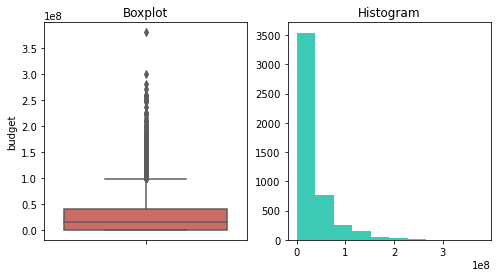

In [16]:
explore_num(movies, 'budget')

Summary Statistics 

count    4.809000e+03
mean     8.227511e+07
std      1.628379e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291317e+07
max      2.787965e+09
Name: revenue, dtype: float64


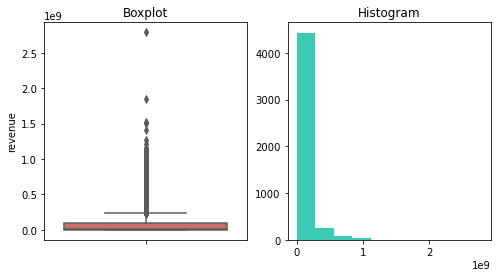

In [17]:
explore_num(movies, 'revenue')

Summary Statistics 

count    4807.000000
mean      106.882255
std        22.602535
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64


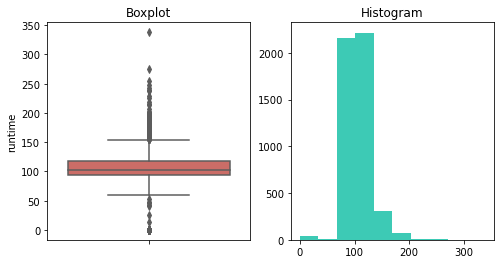

In [18]:
explore_num(movies, 'runtime')

Summary Statistics 

count     4809.000000
mean       690.331670
std       1234.187111
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64


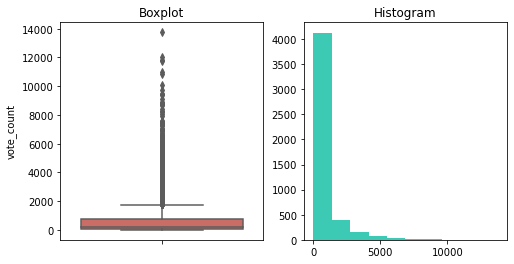

In [19]:
explore_num(movies, 'vote_count')

## 3.Data-Preprocessing-for-Modeling

In [20]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [21]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
import ast

In [23]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [24]:
# dropping null columns
movies.dropna(inplace=True)

In [25]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(5)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [28]:
def convert_append(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [29]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [30]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [31]:
def fetchdirector(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [32]:
movies['crew'] = movies['crew'].apply(fetchdirector)

In [33]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
4774,44770,The Exploding Girl,"On a summer break from college, Ivy, a young e...","[Drama, Romance]",[independent film],"[Zoe Kazan, Mark Rendall, Maryann Urbano]",[Bradley Rust Gray]
3649,8744,Albino Alligator,Three petty thieves who the police believe to ...,"[Crime, Drama, Thriller]","[brother brother relationship, bar, gun, hosta...","[Matt Dillon, Faye Dunaway, Gary Sinise]",[Kevin Spacey]
2584,8975,The Marine,A group of diamond thieves on the run kidnap t...,"[Action, Adventure, Drama, Thriller]","[gangster boss, wife, war, change, iraq war]","[John Cena, Kelly Carlson, Robert Patrick]",[John Bonito]
3138,17577,The Devil's Tomb,Captain Mack leads an elite military unit on a...,"[Action, Horror, Thriller, Science Fiction]","[duct tape gag, bandana, headshot, camoflage u...","[Cuba Gooding Jr., Ray Winstone, Ron Perlman]",[Jason Connery]
2499,152599,The Immigrant,An innocent immigrant woman is tricked into a ...,"[Drama, Romance]","[new york, corruption, sister sister relations...","[Marion Cotillard, Jeremy Renner, Joaquin Phoe...",[James Gray]


In [34]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [35]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [36]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [37]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [38]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [39]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()

In [40]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
    

In [42]:
vector = cv.fit_transform(new['tags']).toarray()

In [43]:
vector.shape

(4806, 5000)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
similarity = cosine_similarity(vector)

In [46]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [47]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [48]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)
        
    

In [49]:
recommend('Avatar')

Titan A.E.
Small Soldiers
Ender's Game
Aliens vs Predator: Requiem
Independence Day


In [50]:
import pickle

In [51]:
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))